### 파생변수

In [30]:
import pandas as pd

In [ ]:
test = pd.read_csv('/Users/t2023-m0149/Documents/spartacodingclub/Projects/4. insurance/test.csv')

In [ ]:
sample = pd.read_csv('/Users/t2023-m0149/Documents/spartacodingclub/Projects/4. insurance/sample.csv')

In [ ]:
train = pd.read_csv('/Users/t2023-m0149/Documents/spartacodingclub/Projects/4. insurance/train.csv')

In [34]:
print("전체 행 개수 :", len(train))
print(train.isna().sum())     

전체 행 개수 : 1155051
Age                          0
Gender                       0
Annual Income                0
Marital Status               0
Number of Dependents         0
Education Level              0
Occupation              344825
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Customer Feedback        73897
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


In [35]:
df.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

## 상관계수

## 상관계수

### 엔지니어링

In [43]:
# 기존 변수 + 파생변수 포함
df["Income_per_Dependent"] = df["Annual Income"] / (df["Number of Dependents"] + 1)
df["Age_Bucket"] = pd.cut(df["Age"], bins=[0, 25, 35, 50, 65, 100], labels=["0-25", "26-35", "36-50", "51-65", "66+"])
df["Duration_per_Vehicle_Age"] = df["Insurance Duration"] / (df["Vehicle Age"] + 1)
df["Income_per_Health"] = df["Annual Income"] / (df["Health Score"] + 1)
df["Credit_Age_Ratio"] = df["Credit Score"] / (df["Age"] + 1)
df["Dependents_Category"] = pd.cut(df["Number of Dependents"], bins=[-1, 0, 2, 5, 10], labels=["None", "Low", "Medium", "High"])
df["Premium_per_Duration"] = df["Premium Amount"] / (df["Insurance Duration"] + 1)

In [44]:
pip install statsmodels

You should consider upgrading via the '/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_12503/259242991.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_data, y='feature', x='VIF', palette='viridis')


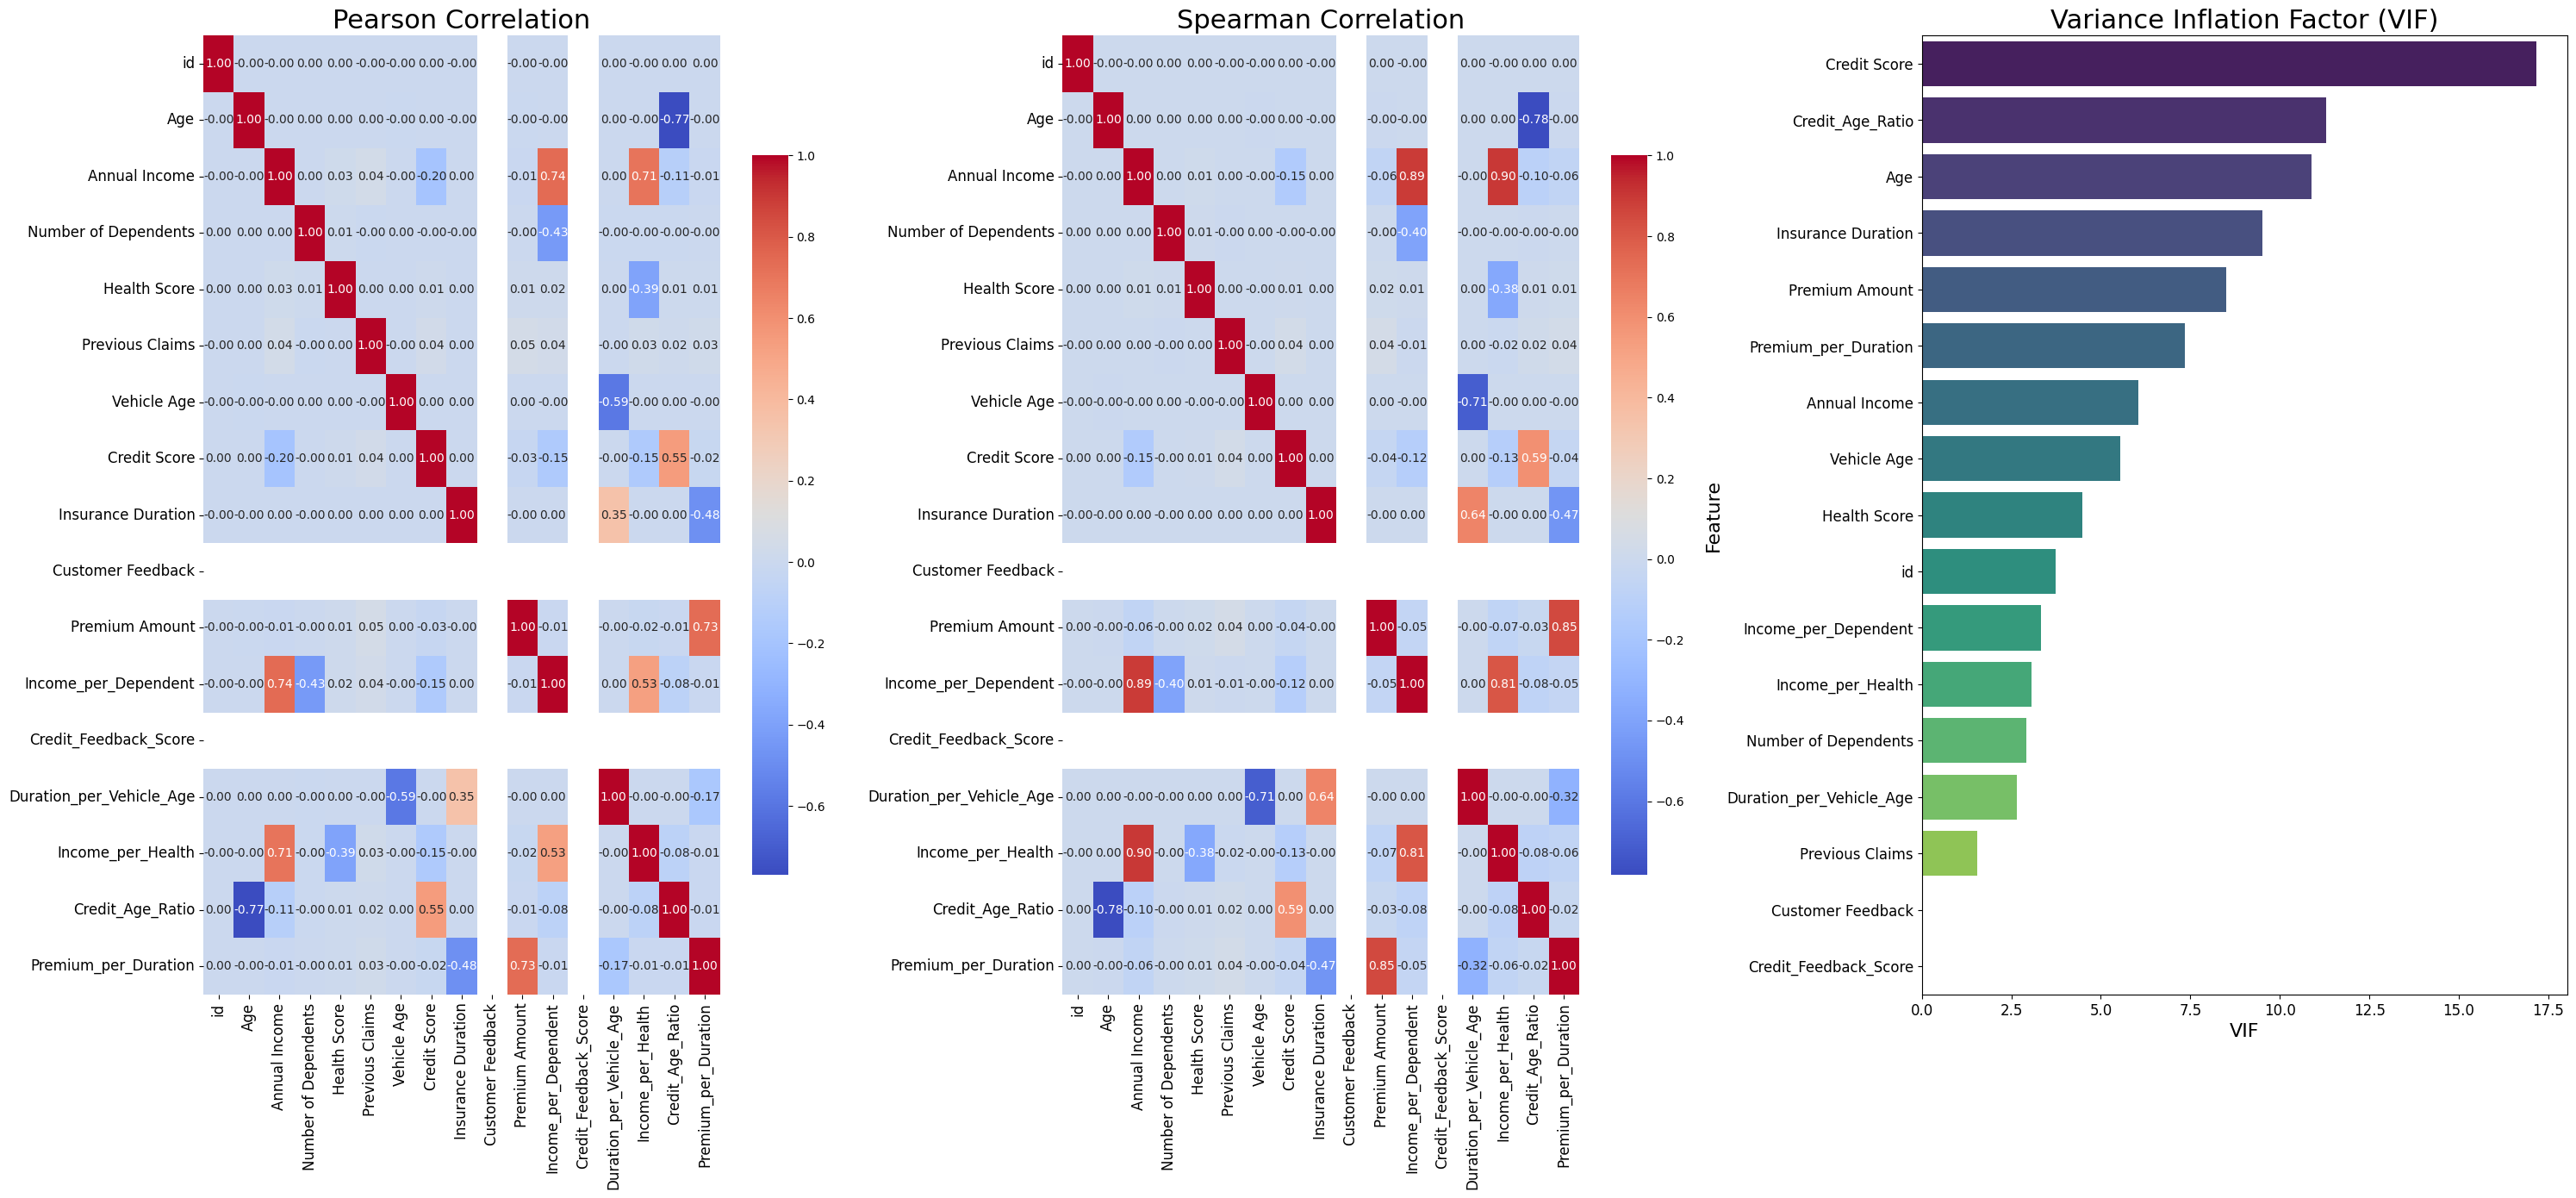

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 수치형 변수만 추출
num_cols = df.select_dtypes(include=[np.number])

# 피어슨 상관계수 행렬
pearson_corr = num_cols.corr(method='pearson')

# 스피어슨 상관계수 행렬
spearman_corr = num_cols.corr(method='spearman')

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = num_cols.columns
vif_data['VIF'] = [variance_inflation_factor(num_cols.fillna(0).values, i) for i in range(num_cols.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# *** 표 크게 시각화 ***
plt.figure(figsize=(30, 14))  # 전체 그림을 크게

plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.75})
plt.title('Pearson Correlation', fontsize=22)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.75})
plt.title('Spearman Correlation', fontsize=22)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.subplot(1, 3, 3)
sns.barplot(data=vif_data, y='feature', x='VIF', palette='viridis')
plt.title('Variance Inflation Factor (VIF)', fontsize=22)
plt.xlabel('VIF', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')